In [162]:
!jupyter nbconvert --to script puzzles.ipynb

[NbConvertApp] Converting notebook puzzles.ipynb to script
[NbConvertApp] Writing 6691 bytes to puzzles.py


# Programming Puzzles

This is a list of (hopefully interesting) programming puzzles I created (mainly for my own enrichment) with solutions and brief explanations. I didn't want to place any unnecessary restrictions on how the problems are to be approached, but there will be some occasional suggestions about possible variants you might want to try (e.g., finding an answer with a certain time/space complexity, using a certain data structure, etc). Pull requests with better or more interesting solutions, as well as new problems, are welcome.

Find the smallest palindromic positive integer greater than 100,000 which contains, in its sequence of digits, the floor of its own square root.

In [1]:
base = ''
for d in range(4):
    for i in range(10):
        s = str(i)
        num = s+base+s
        root = int(num) ** (1/2)
        if str(root) in str(num):
            print(num)
            break

In [2]:
import math
def check(A, B=None):
    s = str(A)
    if B is None:
        num = s+s[::-1]
    else:
        num = s+str(B)+s[::-1]
#     print(num)
    root = math.floor(int(num) ** (1/2))
    if str(root) in num:
#         print(num)
        return num, root

for a in range(10000):
    r = check(a)
    if r:
#         break
        print(r)
    for b in range(10):
        t = check(a, b)
        if t:
            print(t)

('00', 0)
('000', 0)
('080', 8)
('090', 9)
('101', 10)
('828', 28)
('99', 9)
('10001', 100)
('5775', 75)
('77277', 277)
('7887', 88)
('89298', 298)
('9999', 99)
('1000001', 1000)
('249942', 499)
('250052', 500)
('359953', 599)
('360063', 600)
('4205024', 2050)
('7269627', 2696)
('788887', 888)
('8287828', 2878)
('8992998', 2998)
('9305039', 3050)
('999999', 999)
('100000001', 10000)
('211454112', 14541)
('24999942', 4999)
('25000052', 5000)
('32755723', 5723)
('35999953', 5999)
('36000063', 6000)
('42566524', 6524)
('46844864', 6844)
('57588575', 7588)
('624999426', 24999)
('625000526', 25000)
('899929998', 29998)
('99999999', 9999)


Write a function that takes as an input a (ASCII) string of an arbitrary length $l$ (at least one character) and compactly encodes it into a square binary matrix with $n$ rows and columns, where $1<=n<=l$. Write a second function that accepts a matrix generated by the first function and returns the original string.

Let $a$ be the set of natural numbers (positive integers) in the range $[1, 1000]$; that is, $a=\{x \in N | 1 \le x \le 1000 \}$. Then, let $F$ be a function such that $F(g) = \{\left\|(h!)\right\| | h \in g \}$, where for an integer $j$ in the set $g$, $\|j\|$ denotes the number of digits in $h$ (length of its string form, ignoring leading zeros). $V$ is a function that iteratively applies $F$ to its initial inputs: $V(t, n)=F^n(t)$. Efficiently compute this process for each value through 42 iterations ($n=42$) and output the sum of these values; your answer will be:

\begin{equation}
\displaystyle
\sum\limits_{b \in a} V(b, 42)
\end{equation}

If you attain sufficient efficiency on these terms (perhaps execution in under 30 seconds), attempt to further optimize your algorithm and scale the number of inputs by an order of magnitude or more.

In [3]:
math.log10(567)

2.7535830588929064

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [91]:
previous = {}

In [149]:
# This snippet is from https://stackoverflow.com/q/13657265/10940584
def multiply_range(n, m):
    if n == m:
        return n
    if m < n:
        return 1
    else:
        return multiply_range(n, (n+m)//2) * multiply_range((n+m)//2+1, m)

def divide_and_conquer(n):
    return multiply_range(1, n)

In [152]:
divide_and_conquer(20)

2432902008176640000

In [148]:
math.factorial(20)

2432902008176640000

In [157]:
print(factorial(5))

120


[613]
15400961


<Figure size 432x288 with 0 Axes>

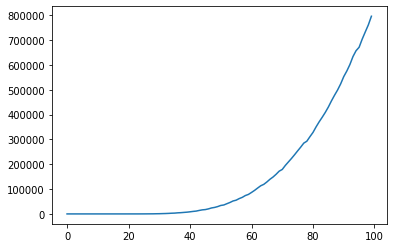

In [161]:

def factorial(z, threshold=10e4):
#     global previous
    
    r = 1
    if z in previous:
        return previous[z]
    if z == 0:
        return 1
    i = 1
    
    if previous:
        bounded = filter(lambda h: h[0]<z, previous.items())
        try:
            p = max(bounded, key=lambda d: d[0])
            i, r = p
        except:
            pass
#     max(p[0], 1)
#     for w in range(i+1, z):
#         if w not in previous:
#             f = 
#             r *= w
#             previous[w] = r
#         else:
#             r *= previous[w]
        
#         r *= w

    if z < threshold:
        r *= math.factorial(z-i)
#     Above threshold, use faster "divide and conquer" factorial algorithm
    else:
        r *= divide_and_conquer(z-i)
    
    out = r * z
    previous[z] = out
    return out

def F(g, mem=True):
    fact = factorial if mem else math.factorial
    return [math.ceil(math.log10(fact(h))) for h in g]

def V(t, n, **kwargs):
    for k in range(n):
        t = F(t, **kwargs)
    return t

q = 100
print(F([299]))
a = list(range(1, q+1))
output = V(a, 9, mem=True)

fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(output)
# ax.set_yscale('log')
print(sum(output))

In [138]:
math.log10(math.factorial(32586))

132912.36551807402

In [168]:
len(str(factorial(50000)))

211386

In [127]:
list(previous.items())[:100]
len(list(previous.items()))

2669

## Automated Logical Induction

Compose a short heuristic program that, given a series of logical statements, can infer logical conclusions.

In [ ]:
statements = [
    'All Fs are Gs',
    'Some Gs are Qs',
    'All Qs are Ts unless they are Gs'
]
query = 'Are any Fs also Qs?'

Determine the number of possible ways a 2-dimensional chessboard (i.e., an 8 by 8 grid) could be covered in dominoes if a single domino covers two directly adjacent squares on the board, each domino must not overlap or share any squares with another, and the entire board would be covered. For a hint, take a look at this illuminating slideshow: https://www.math.cmu.edu/~bwsulliv/domino-tilings.pdf

Sample 1 million tilings from the distribution of all possible domino tilings of the chessboard. Write an algorithm to estimate the entropy of each tiling (e.g., alternating squares of vertical and horizontal pairs of dominoes would have more entropy than a "random" arrangement); apply this to the tilings you sampled and use these values to find the most entropic tiling and display it.

Challenge: Sample *uniformly* from the distribution of possible tilings such that all distinct patterns (observing rotations, reflections, etc.) are equally likely to be selected.
Challenge: Examine the relationship between tiling entropy and their other mathematical properties.

Challenge: assume the chessboard in the previous problem is projected onto the surface of a torus such that its edges "wrap" around to the other size. That is, a domino can cross between two opposite edges of the board.

Generalize the chessboard-tiling algorithm to the case where the board size is $n \times m$ and $n\ge1, m\ge1$. Note that some combinations (most obviously, the 1 by 1 board) cannot be perfectly tiled using only 1 by 2 dominoes (as an additional challenge, you may find a heuristic for determining which board sizes are solvable).

Further generalize the algorithm from the previous questions to 3 dimensions (with an 8x8x8 chessboard). The third dimension of the dominoes should be one unit wide (so they are 2x1x1).